# LGI Assumptions

This notebook creates graphs for each group and examines if they differ from random graphs.

The first part of the script imports the data and creates graphs.

In [1]:
import pandas as pd
from scona.visualisations import plot_network_measures, plot_degree_dist, plot_rich_club
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set_style('dark')

import functions.statistical_functions as Sfun
import functions.plotting_functions as Pfun


This code creates the enviornmental variable for where the data is stored. Create a .env file in the directory with the file path to data.

In [2]:
from decouple import config

data = config('data')
results = config('results')

In [3]:
lh_lgi = pd.read_csv(f'{data}/lh_lgi.dat',sep='\t').drop([
                     'BrainSegVolNotVent', 'eTIV'],axis=1).rename(columns={'lh.aparc.pial_lgi.thickness':'G-Number'})
                     
rh_lgi =  pd.read_csv(f'{data}/rh_lgi.dat',sep='\t').drop([
                       'BrainSegVolNotVent', 'eTIV','rh.aparc.pial_lgi.thickness'],axis=1)

group = pd.read_csv(f'{data}/cortical_measures.csv').iloc[0:,2]
lgi = pd.concat([lh_lgi, rh_lgi, group],axis=1)

names = list(lgi.columns.drop(['G-Number','age_adjusted_group']))

centroids = pd.read_csv(f'{data}/atlas.csv') #This atlas was obtained from braingraph R package
centroids = centroids[['x.mni', 'y.mni', 'z.mni']].to_numpy()

group = lgi.groupby('age_adjusted_group')
aan = group.get_group('AAN').reset_index(drop=True)
hc = group.get_group('HC').reset_index(drop=True)
wr = group.get_group('WR').reset_index(drop=True)

In [4]:
aan_graphs = Sfun.create_graphs(aan.iloc[:,1:69], names, centroids)
wr_graphs = Sfun.create_graphs(wr.iloc[:,1:69], names, centroids)
hc_graphs = Sfun.create_graphs(hc.iloc[:,1:69], names, centroids)

## Creation of Random Graphs.

This simulates random graphs to check that the actual graph differ from random graphs

In [11]:
brain_bundle_aan = Sfun.permutations(aan_graphs['graph_threshold'], results, name='AAN_LGI', perms=10000)

Loading CSVs


In [12]:
brain_bundle_wr = Sfun.permutations(wr_graphs['graph_threshold'], results, name='WR_LGI', perms=10000)

Loading CSVs


In [13]:
brain_bundle_hc = Sfun.permutations(hc_graphs['graph_threshold'], results, name='HC_LGI', perms=10000)

Loading CSVs


## View distibution of the simulated random graphs.

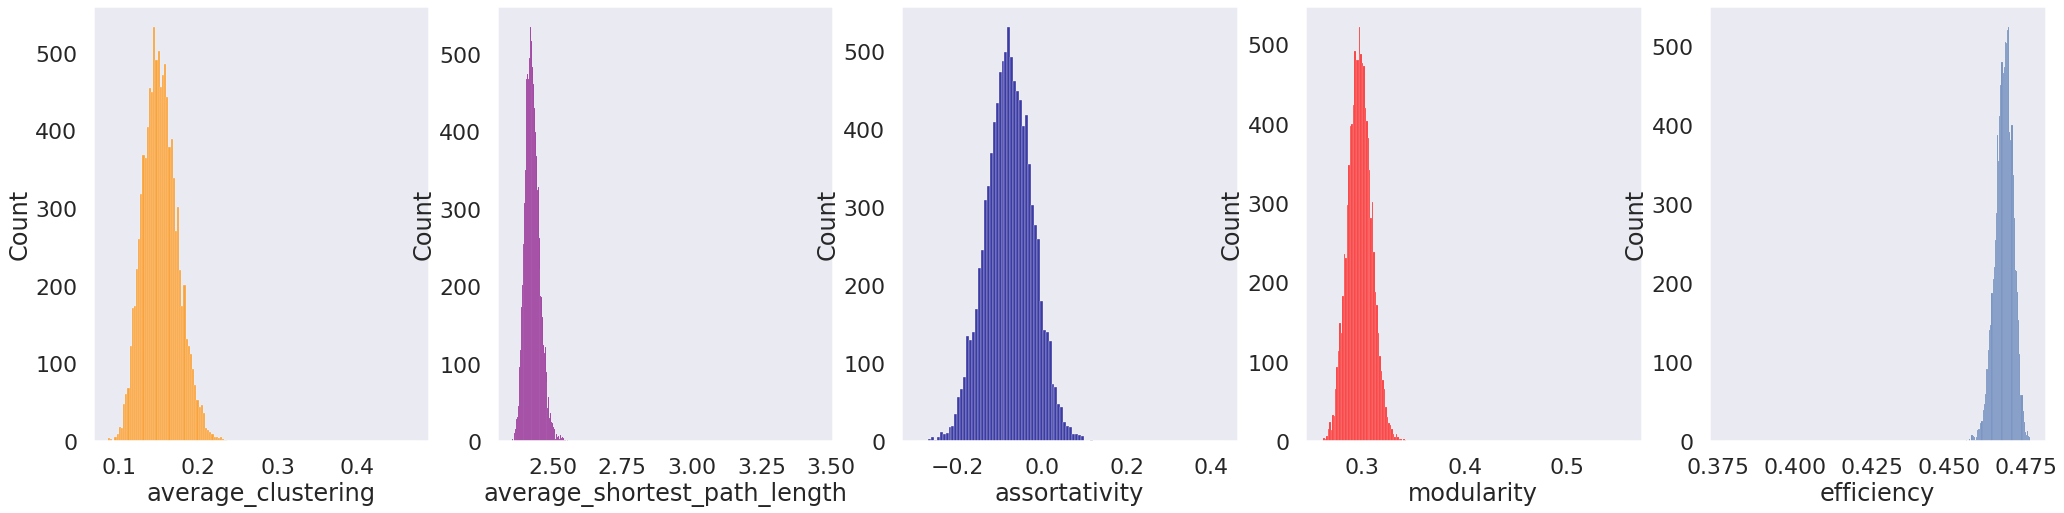

In [19]:
Pfun.distro_plots(brain_bundle_aan['global_measures'])

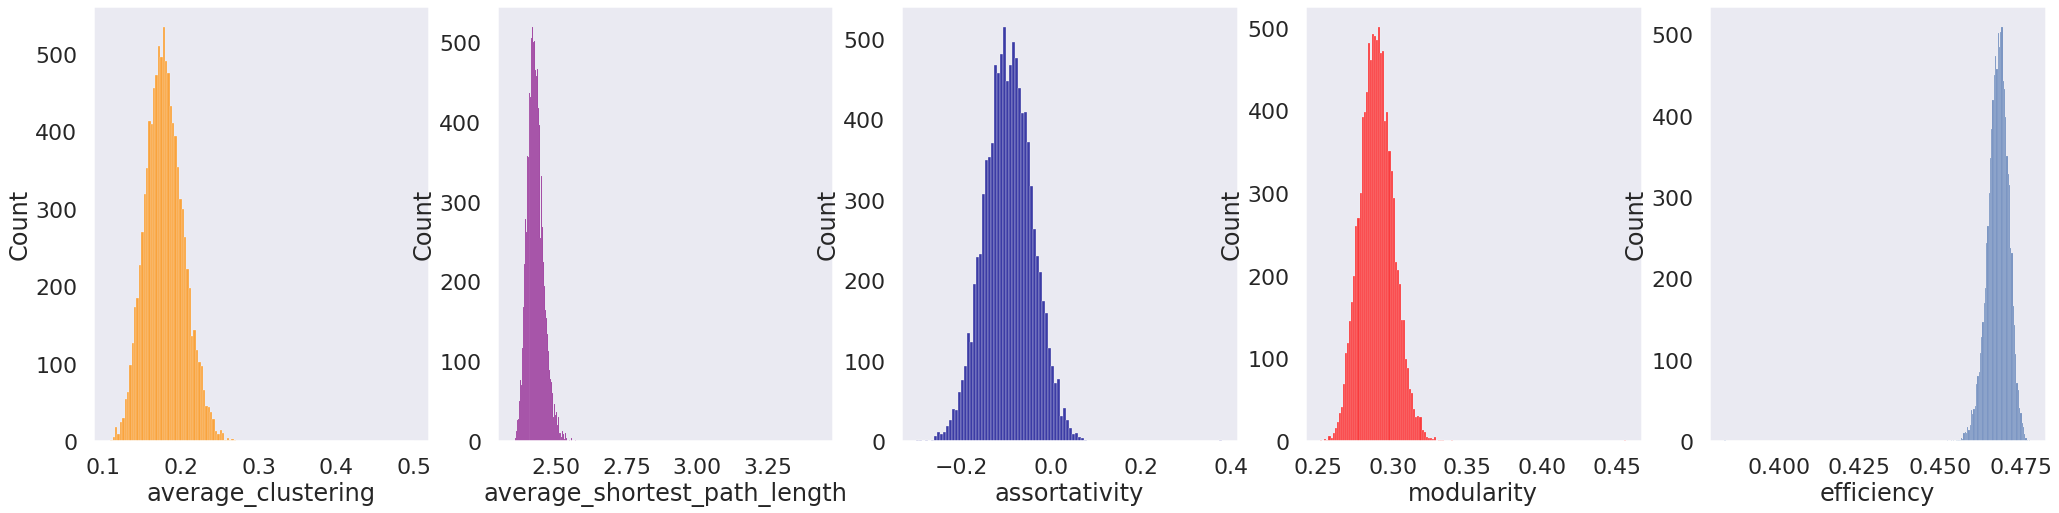

In [20]:
Pfun.distro_plots(brain_bundle_wr['global_measures'])

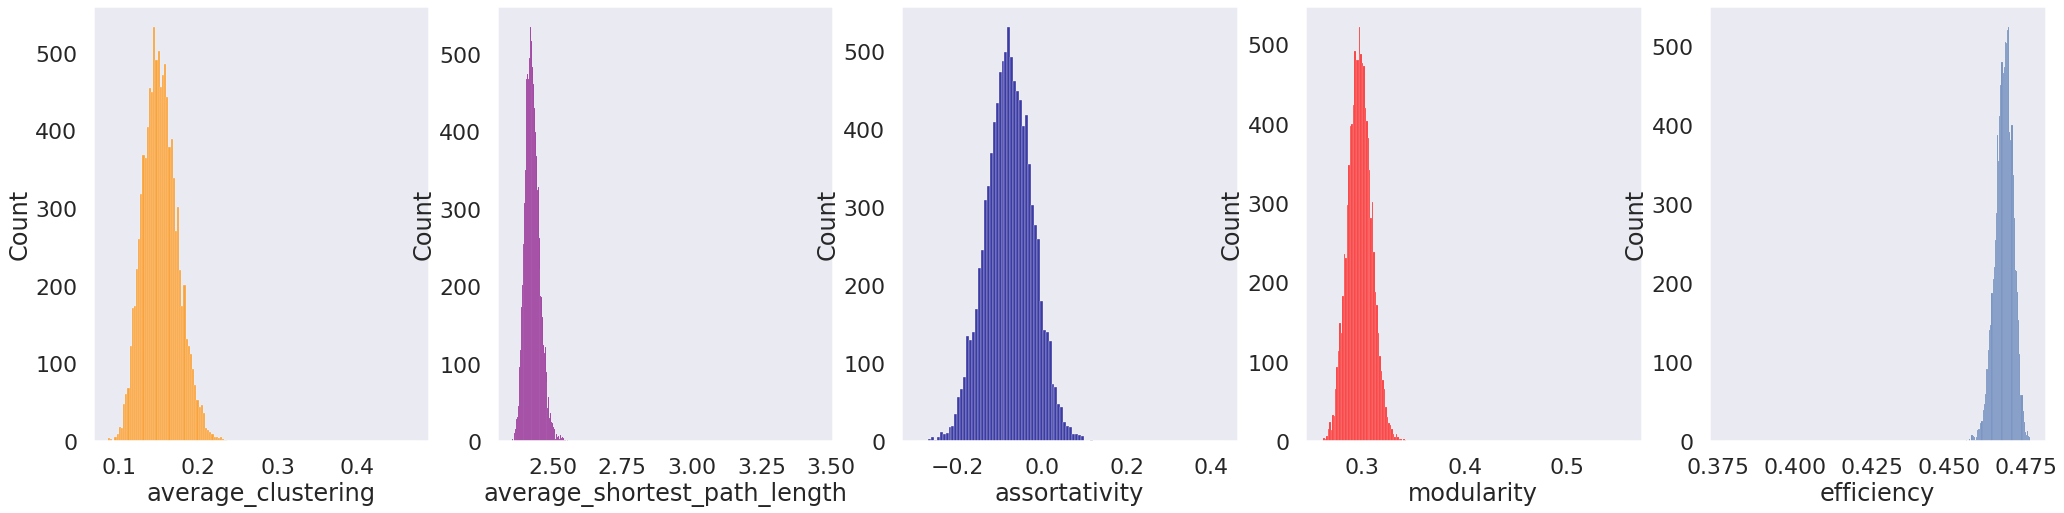

In [18]:
Pfun.distro_plots(brain_bundle_hc['global_measures'])

## Plotting degree distribution

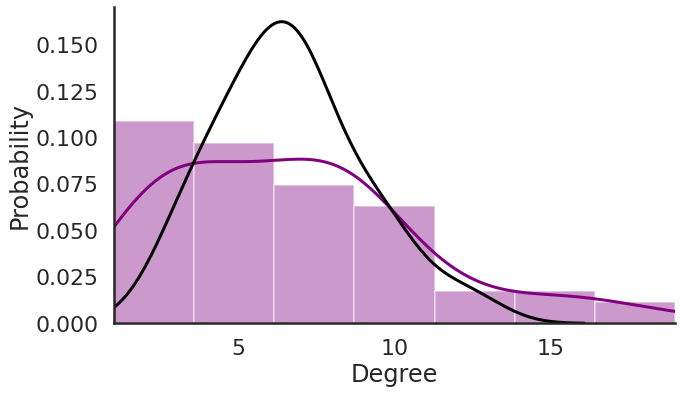

In [14]:
plot_degree_dist(aan_graphs['graph_threshold'], color=["purple", "black"])

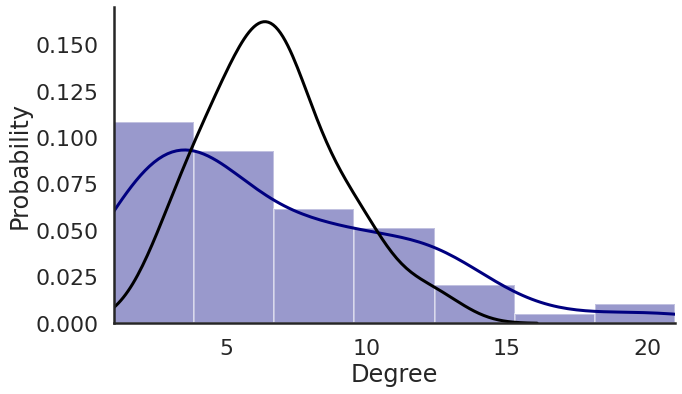

In [15]:
plot_degree_dist(wr_graphs['graph_threshold'], color=["navy", "black"])

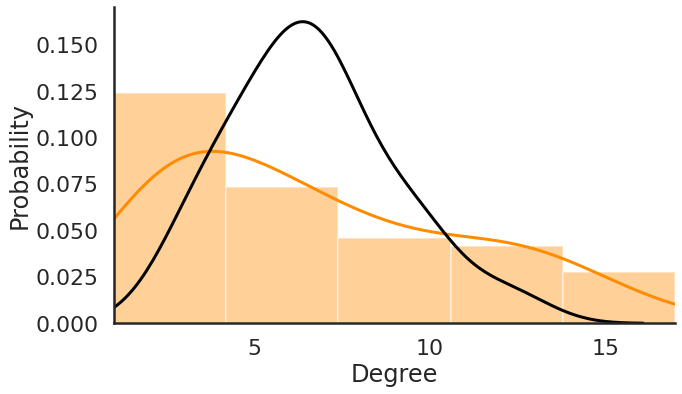

In [16]:
plot_degree_dist(hc_graphs['graph_threshold'], color=["darkorange", "black"])

## Plotting global Measures.

In [23]:
brain_bundle_aan['global_measures'].head()

,Unnamed: 0,average_clustering,average_shortest_path_length,assortativity,modularity,efficiency
0,AAN_LGI_thresholded,0.471697,3.453907,0.425740,0.557441,0.377162
1,AAN_LGI_thresholded_R0,0.146426,2.413082,-0.065355,0.293225,0.469359
2,AAN_LGI_thresholded_R1,0.173746,2.405180,-0.138067,0.304209,0.471144
3,AAN_LGI_thresholded_R2,0.123189,2.401668,-0.105777,0.290618,0.471013
4,AAN_LGI_thresholded_R3,0.168304,2.418349,-0.083243,0.311779,0.468854


In [26]:
plot_network_measures(brain_bundle_aan['global_measures'], original_network='AAN_LGI_thresholded', color=['purple','slategrey'], ci=95)

AttributeError: 'DataFrame' object has no attribute 'report_global_measures'

In [ ]:
plot_network_measures(brain_bundle_wr[''], original_network='WR_LGI_thresholded', color=['navy','slategrey'], ci=95)

In [ ]:
plot_network_measures(brain_bundle_hc[''], original_network='HC_LGI_thresholded', color=['darkorange','slategrey'], ci=95)

## Plotting rich club

In [ ]:
plot_rich_club(brain_bundle_aan[''], color=['purple','slategrey'], original_network='AAN_LGI_thresholded')

In [ ]:
plot_rich_club(brain_bundle_wr[''], color=['navy','slategrey'], original_network='WR_LGI_thresholded')

In [ ]:
plot_rich_club(brain_bundle_hc[''], color=['darkorange','slategrey'], original_network='HC_LGI_thresholded')